# Pandas Practice B

# 🎯 Objectives

By completing this notebook you will practice and strengthen your skills in:
- Data loading and exploration
- Grouping and aggregation
- Filtering and sorting
- Visualization with Pandas
- Data cleaning and feature engineering
- Merging and joining datasets
- Pivot tables and reshaping
- Datetime and string operations
- Working with MultiIndex
- Apply & lambda functions
- Cumulative operations

These exercises are designed to prepare you for real-world **Data Analysis** and to build a strong foundation for **Data Science** tasks.

## Section 1: Basic Exploration
1. Load `sales.csv`. Check data types (`.dtypes`) and convert `date` to `datetime` if needed.
2. How many total transactions are in the dataset?

### 🔥 Challenge Task (Section 1: Exploration)
Combine multiple exploration methods:
- Count unique regions and products
- Find the average revenue
- Identify the date with the maximum total revenue

*(Notebook: Practice B, Section 1)*

In [12]:
import pandas as pd

df = pd.read_csv('csv/sales.csv')

if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])
    
n_transactions = df['date'].count()
n_unique_regions = df['region'].nunique()
n_unique_product = df['product'].nunique()
avg_revenue = df['revenue'].mean().round(2)

date_with_maxrevenue = (
    df
    .groupby('date')['revenue']
    .sum()
    .idxmax()
)
print("Total transactions:", n_transactions)
print("Unique regions:", n_unique_regions)
print("Unique products:", n_unique_product)
print("Average revenue:", avg_revenue)
print("Date with max total revenue:", date_with_maxrevenue.date())


Total transactions: 200
Unique regions: 5
Unique products: 5
Average revenue: 222.08
Date with max total revenue: 2023-01-08


## Section 2: Groupby & Aggregation
3. Find the total `quantity` per product.
4. For each date, calculate the **average revenue per region**.
5. Determine which product generated the highest revenue across all regions.

### 🔥 Challenge Task (Section 2: Groupby)
Perform a multi-level groupby (`region`, `product`) and:
- Find the total revenue
- Identify the top product in each region

*(Notebook: Practice B, Section 2)*

In [13]:
product_quantity = (
    df
    .groupby('product')['quantity']
    .sum()
)
avg_region_revenue = (
    df
    .groupby('region')['revenue']
    .mean()
    .round(2)
)
best_seller = (
    df
    .groupby('product')['revenue']
    .sum()
    .idxmax()
)
total_region_revenue = (
    df
    .groupby(['region', 'product'])['revenue']
    .sum()
    .reset_index(name='total_revenue')
)
best_seller_region = (
    total_region_revenue
    .loc[total_region_revenue.groupby('region')['total_revenue'].idxmax()] 
)
print(best_seller_region)

     region    product  total_revenue
0   Central  Product A         2040.0
9      East  Product E         3609.0
11    North  Product B         2788.0
19    South  Product E         2128.0
21     West  Product B         2768.0


## Section 3: Filtering & Sorting
6. Select all rows where `revenue < 100`.
7. Find the transactions with the highest and lowest `quantity`.
8. Show the top 3 products by average revenue (across all transactions).

### 🔥 Challenge Task (Section 3: Filtering & Sorting)
Filter products with revenue greater than the overall average and:
- Sort by quantity
- Show the top-N results

*(Notebook: Practice B, Section 3)*

In [14]:
rows_lt_100 = df[df['revenue'] < 100]
max_quantity = df.loc[df['quantity'].idxmax()]
min_quantity = df.loc[df['quantity'].idxmin()]
print(max_quantity)
top3_products_all_regions = (
    df
    .groupby(['product'])['revenue']
    .mean()
    .nlargest(3)
)
avg_revenue = df['revenue'].mean()
products_with_gt_avg_revenue = df[df['revenue'] > avg_revenue].sort_values('quantity', ascending=False)
print(products_with_gt_avg_revenue[['product','revenue']].head(3))

date        2023-01-24 00:00:00
region                     West
product               Product D
quantity                     19
price                      0.53
revenue                    10.0
Name: 22, dtype: object
       product  revenue
62   Product E    483.0
33   Product C    420.0
128  Product E    329.0


## Section 4: Visualization
9. Plot a **line chart** of cumulative revenue over time.
10. Plot a **bar chart** of total revenue by region.
11. Plot a **boxplot** of `quantity` (distribution of quantities).

### 🔥 Challenge Task (Section 4: Visualization)
Create multiple plots on one figure:
- Line chart of revenue over time
- Bar chart of revenue by region
- Histogram of quantity

*(Notebook: Practice B, Section 4)*

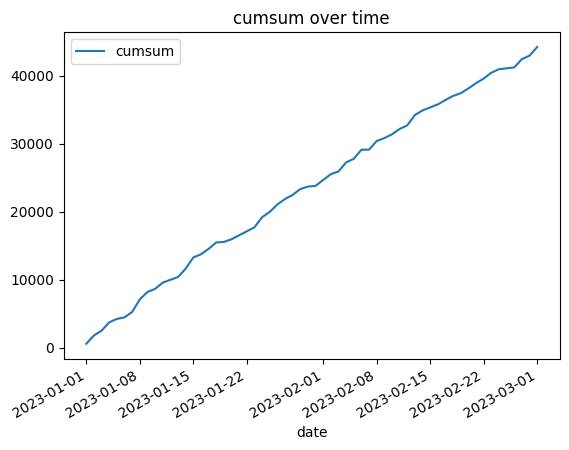

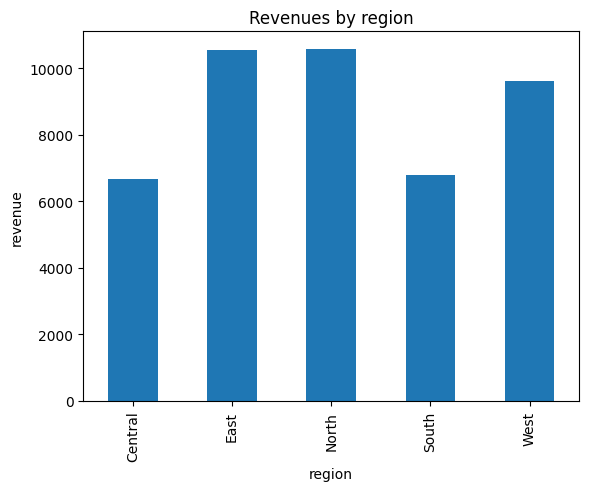

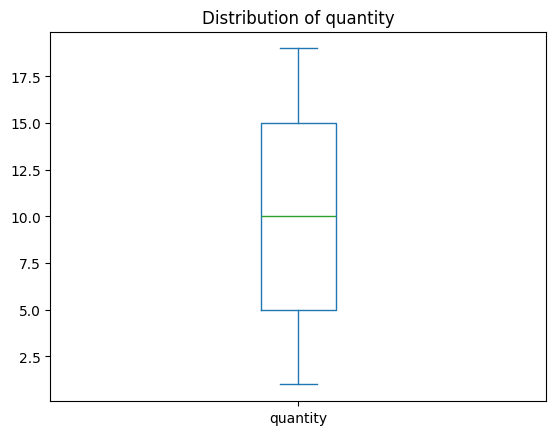

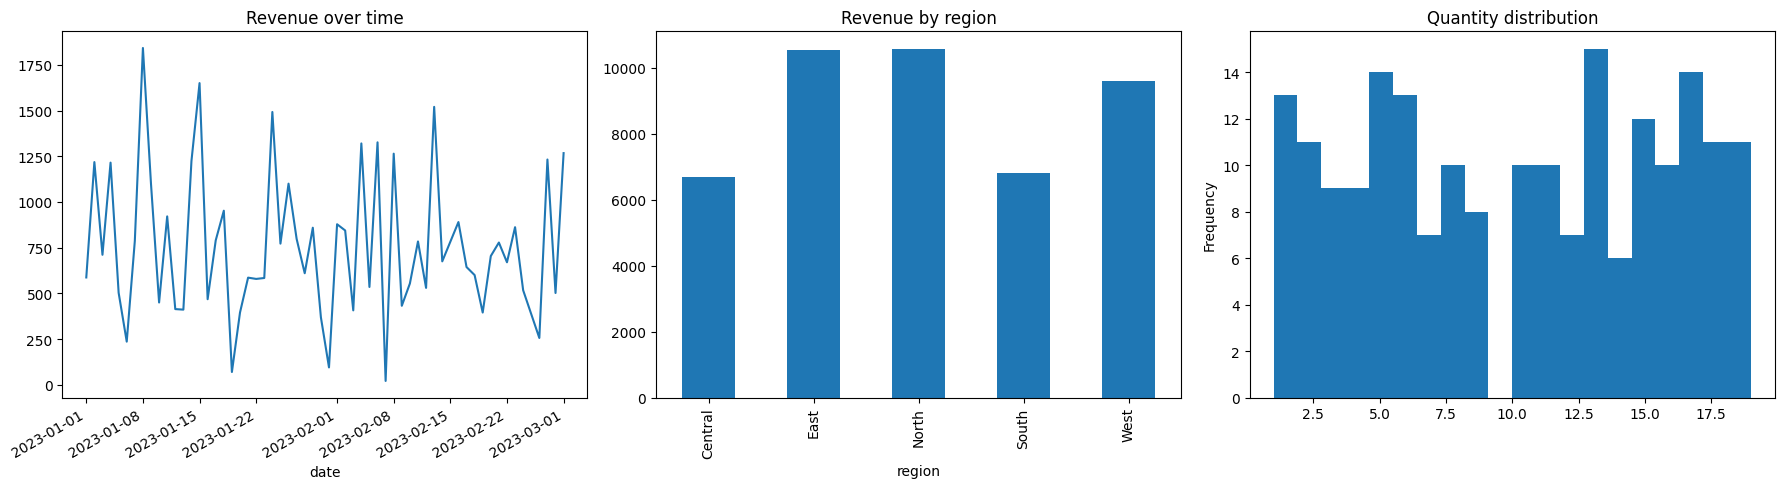

In [15]:
import matplotlib.pyplot as plt

df.groupby('date')['revenue'].sum().cumsum().reset_index(name='cumsum').plot(
    kind='line', x='date', y='cumsum', title='cumsum over time'
)
plt.show()
df.groupby('region')['revenue'].sum().plot(
    kind='bar', title='Revenues by region', ylabel='revenue'
)
plt.show()

df['quantity'].plot.box(title='Distribution of quantity')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18,5))

df.groupby('date')['revenue'].sum().plot(
    ax=axes[0], kind='line', title='Revenue over time'
)
df.groupby('region')['revenue'].sum().plot(
    ax=axes[1], kind='bar', title='Revenue by region'
)

df['quantity'].plot.hist(
    ax=axes[2], bins=20, title='Quantity distribution'
)

plt.tight_layout()
plt.show()


## Section 5: Portfolio Challenge
12. Write a function `product_summary(df)` that returns a dictionary with:
- the most popular product by sales quantity,
- the product with the highest average revenue,
- total revenue across all products.

### 🔥 Challenge Task (Section 5: Portfolio Challenge)
Extend your function to also return:
- Cumulative revenue
- Number of unique transaction dates

*(Notebook: Practice B, Section 5)*

In [16]:
def product_summary(filename: str)->dict:
    df = pd.read_csv(filename)
    return {
        'Most popular product by quntity sold': df.groupby('product')['quantity'].sum().idxmax(),
        'Product with highest avg revenue': df.groupby('product')['revenue'].mean().idxmax(),
        'Total revenue': df['revenue'].sum(),
        'Cumulative revenue': df['revenue'].cumsum().iloc[-1],
        'Unique transaction dates': df['date'].nunique()
    }
product_summary('csv/sales.csv')

{'Most popular product by quntity sold': 'Product D',
 'Product with highest avg revenue': 'Product A',
 'Total revenue': np.float64(44193.0),
 'Cumulative revenue': np.float64(44193.0),
 'Unique transaction dates': 58}

## Section 6: Advanced Pandas

### Data Cleaning
1. Check if there are any missing values in `sales.csv`. Fill them with zeros.
2. Remove duplicate transactions if they exist.
3. Replace all negative values in the `revenue` column with 0.

### Feature Engineering
4. Create a new column `price_per_unit` = `revenue / quantity`.
5. From the `date` column, extract two new columns: `year` and `month`.
6. Use `pd.cut` to categorize `revenue` into three groups: 'low', 'medium', 'high'.

### Merging & Joining
7. Create two DataFrames:
   - `products` (product_id, product_name),
   - `sales` (product_id, revenue, quantity).
   Merge them on `product_id`.
8. Use `concat` to combine sales data from two months (`sales_jan.csv` and `sales_feb.csv`).

### Pivot Tables & Reshaping
9. Build a `pivot_table` where rows = regions, columns = products, values = total revenue.
10. Use `melt` to convert data from wide to long format (e.g., from the pivot table).
11. Perform `groupby(['region', 'product'])['revenue'].sum().unstack()` and compare it with the pivot_table.

### 🔥 Challenge Task (Section 6: Advanced Pandas)
Build a full data cleaning pipeline:
- Remove duplicates
- Fill missing values
- Replace negatives
- Create a new feature
- Merge/concat extra data
- Build a pivot table summary

*(Notebook: Practice B, Section 6)*

In [17]:
import numpy as np
df = pd.read_csv('csv/sales.csv')
df.isna().any()
df = df.fillna(0)
df = df.drop_duplicates()
df['revenue'] = df['revenue'].clip(lower=0)
df['price_per_unit'] = (
    df['revenue']
    .div(df['quantity'])
    .replace([np.inf, -np.inf], 0)
    .fillna(0)
    .round(2)
)
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['category'] = pd.cut(df['revenue'],bins=3 , labels=['low', 'medium', 'high'])

products = pd.DataFrame({
    "product_id": [1, 2, 3],
    "product_name": ["Product A", "Product B", "Product C"]
})

sales = pd.DataFrame({
    "product_id": [1, 2, 1],
    "revenue": [100, 200, 150],
    "quantity": [2, 5, 3]
})
merged = pd.merge(products, sales, on='product_id', how='left')
jan = pd.read_csv('csv/sales_jan.csv')
feb = pd.read_csv('csv/sales_feb.csv')
concat = pd.concat([jan, feb], axis=1)
pvt = pd.pivot_table(
    df,
    values = 'revenue',
    index = 'region',
    columns = 'product',
    aggfunc = 'sum',
    fill_value = 0
)
melted = pd.melt(
    pvt.reset_index(),
    id_vars = 'region',
    value_vars = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
    var_name = 'product',
    value_name = 'revenue'
)
compare = df.groupby(['region', 'product'])['revenue'].sum().unstack()

def cleaning_data(filename, extra1=None, extra2=None):
    df = pd.read_csv(filename)
    df = df.drop_duplicates()
    df = df.fillna(0)
    df[['revenue','price']] = df[['revenue','price']].clip(lower=0)
    df['price_per_unit'] = (
    df['revenue']
    .div(df['quantity'])
    .replace([np.inf, -np.inf], 0)
    .fillna(0)
    .round(2)
    )
    if not pd.api.types.is_datetime64_any_dtype(df['date']):
        df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['category'] = pd.cut(df['revenue'],bins=3 , labels=['low', 'medium', 'high'])
    pvt = pd.pivot_table(
    df,
    values = 'revenue',
    index = 'region',
    columns = 'product',
    aggfunc = 'sum',
    fill_value = 0
)
    return pvt
cleaning_data('csv/sales.csv')

product,Product A,Product B,Product C,Product D,Product E
region,,,,,
Central,2040.0,450.0,1317.0,1489.0,1377.0
East,1325.0,2137.0,1276.0,2200.0,3609.0
North,2525.0,2788.0,1343.0,2064.0,1853.0
South,1396.0,606.0,706.0,1961.0,1924.0
West,1964.0,2768.0,1845.0,1414.0,1662.0


## Section 7: Extra Pandas Practice

### Datetime Operations
1. From the `date` column, extract the day of the week for each transaction.
2. Group total revenue by **month** and plot the trend.
3. Resample daily revenue into monthly totals.

### String Operations
4. Select all rows where `product` name contains the letter 'A'.
5. Create a new column with `product` names in uppercase.
6. Split the `region` column (e.g., 'North-East') into two separate columns.

### MultiIndex
7. Perform `groupby(['region', 'product'])['revenue'].sum()` and explore the MultiIndex.
8. Reset the index and compare with the MultiIndex version.
9. Access revenue for a specific region-product pair using `.loc` on MultiIndex.

### Apply + Lambda
10. Create a new column `discounted_revenue` = `revenue` * 0.9 using `.apply`.
11. Use `.apply` with a lambda to classify transactions as 'high' or 'low' revenue.
12. For each product group, apply a custom function that returns the revenue range (max-min).

### Cumulative Operations
13. Compute the cumulative revenue over time.
14. Compute the cumulative maximum of `quantity`.
15. For each region, calculate the cumulative sum of revenue.

### 🔥 Challenge Task (Section 7: Extra Pandas Practice)
Combine datetime, string, and cumulative operations:
- Select only products containing 'A'
- Group by month
- Compute cumulative revenue trend for those products

*(Notebook: Practice B, Section 7)*

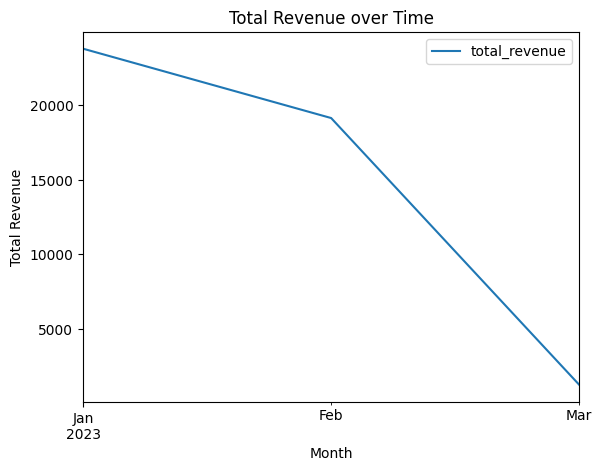

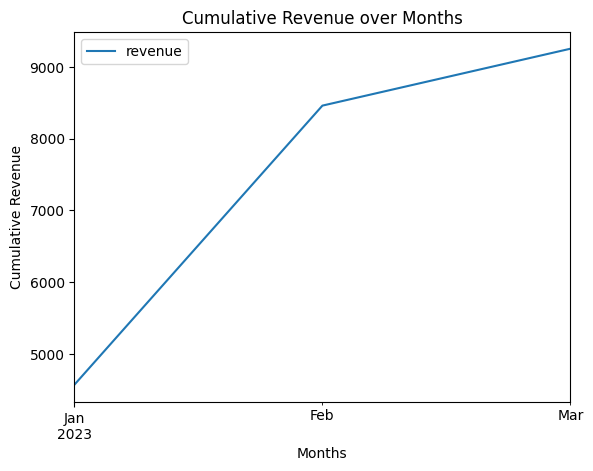

In [18]:
import matplotlib.pyplot as plt
df = pd.read_csv('csv/sales.csv')
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])
df['date'].dt.dayofweek
monthly_revenue = (
    df
    .groupby(df['date'].dt.to_period('M'))['revenue']
    .sum()
    .reset_index(name='total_revenue')
)
monthly_revenue.plot(
    kind='line',
    x='date', 
    y='total_revenue', 
    title='Total Revenue over Time', 
    xlabel='Month', 
    ylabel='Total Revenue'
)
monthly_totals = df.resample('ME', on='date')[['quantity', 'revenue']].sum()
monthly_totals
product_rows_with_A = df.loc[df['product'].str.contains('A')]
df['product_upper'] = df['product'].str.upper()
split_region = (
    df['region']
    .str
    .split('-', n=1, expand=True)
    .fillna('')
)
m_index = df.groupby(['region', 'product'])['revenue'].sum()
m_index_reset = m_index.reset_index()
m_index.loc[('East', 'Product C')]
df['discounted_revenue'] = (
    df['revenue']
    .apply(lambda x: x * 0.9)
)
avg_revenue = df['revenue'].mean()
df['transaction_category'] = (
    df['revenue']
    .apply(lambda x: 'high' if x > avg_revenue else 'low')
)
product_revenue_range = (
    df
    .groupby('product')['revenue']
    .apply(lambda x: f"{x.min()}-{x.max()}")
)
cum_over_time = df.set_index('date')['revenue'].cumsum()
cum_max_quantity = df['quantity'].cummax()

region_cum_revenue = (
    df
    .groupby(['region', 'product'])['revenue']
    .sum()
    .cumsum()
)
selected_product_revenue_over_months = (
    df.loc[df['product'].str.contains('A'), ['date', 'quantity', 'revenue']]
    .resample('ME', on='date')
    .sum()
)
selected_product_revenue_over_months['revenue'].cumsum().reset_index().plot(
    kind='line',
    x='date',
    y='revenue',
    title='Cumulative Revenue over Months',
    xlabel='Months', 
    ylabel='Cumulative Revenue'
)
plt.show()